In [1]:
%matplotlib inline
import cv2
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using CPU


# Importiamo l'immagine

In [4]:
from google.colab import files
img = files.upload()

Saving edificio.jpg to edificio (1).jpg


In [12]:
#carichiamo immagine a colori
img_path = 'edificio.jpg'
img = cv2.imread(img_path)
#la convertiamo in scala di grigi
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
#ridimensioniamo 
h, w = gray.shape
small_img = resize(gray, (int(0.3*h), int(.3*w)))

In [14]:
#ridimensioniamo in modo che i valori si trovino in [0, 1]
small_img = small_img.astype("float32")/255

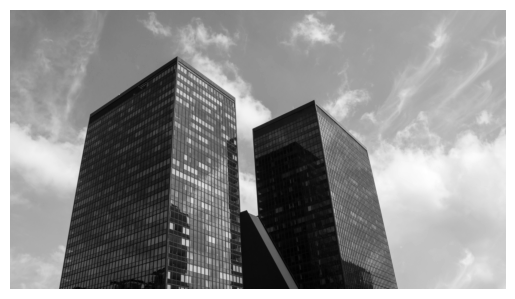

In [15]:
plt.imshow(small_img, cmap='gray')
plt.axis('off');

# Specifichiamo i filtri

In [16]:
filter_vals = np.array([[-1, -1, 1, 1], 
                        [-1, -1, 1, 1], 
                        [-1, -1, 1, 1], 
                        [-1, -1, 1, 1]])

#definiamo 4 filtri
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

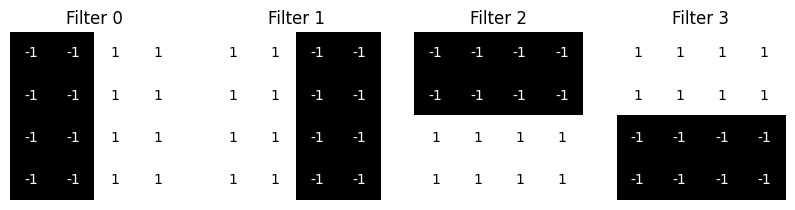

In [17]:
#visualizziamo tutti i filtri
fig, axes = plt.subplots(ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# Visualizziamo le Activation Maps per ciascun filtro

(-0.5, 1151.5, 647.5, -0.5)

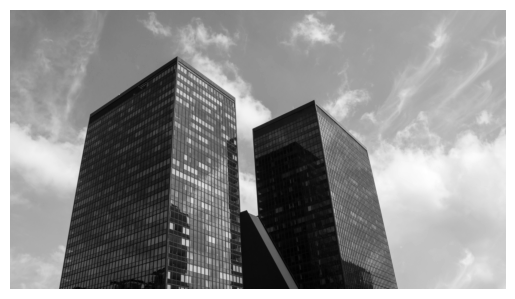

In [18]:
plt.imshow(small_img, cmap='gray')
plt.axis('off')

In [19]:
#definiamo un singolo strato della CNN
cnn = Sequential([
    Convolution2D(1, (4, 4), 
                  activation='relu', 
                  input_shape=(small_img.shape[0], small_img.shape[1], 1))
])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 645, 1149, 1)      17        
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Applichiamo il filtro convolutivo e restituiamo l'output

In [21]:
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    cnn.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(cnn.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

I bordi sono visibili nella riga inferiore.

1/1 [==============================] - 0s 130ms/step


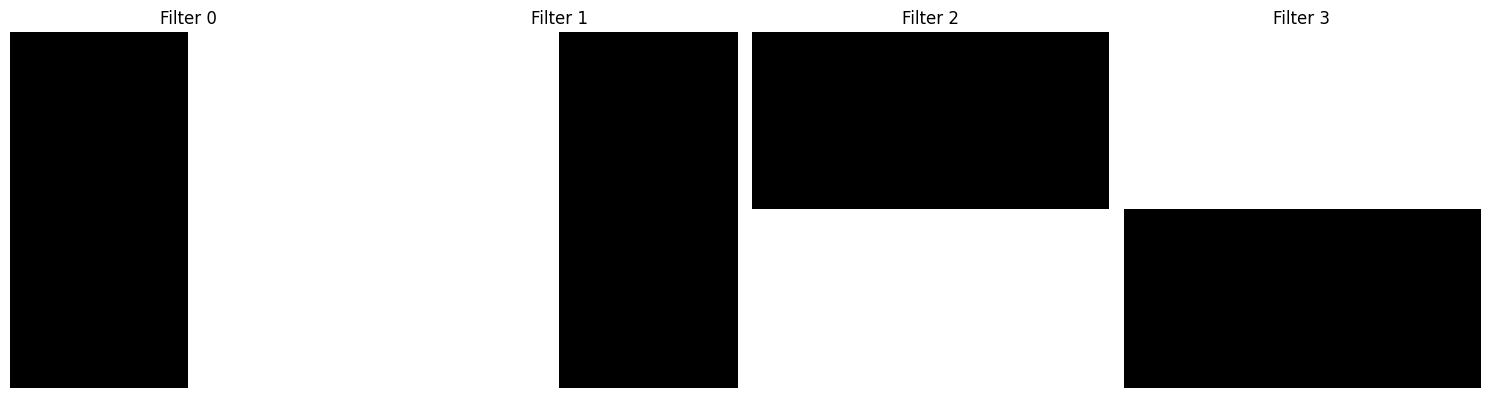

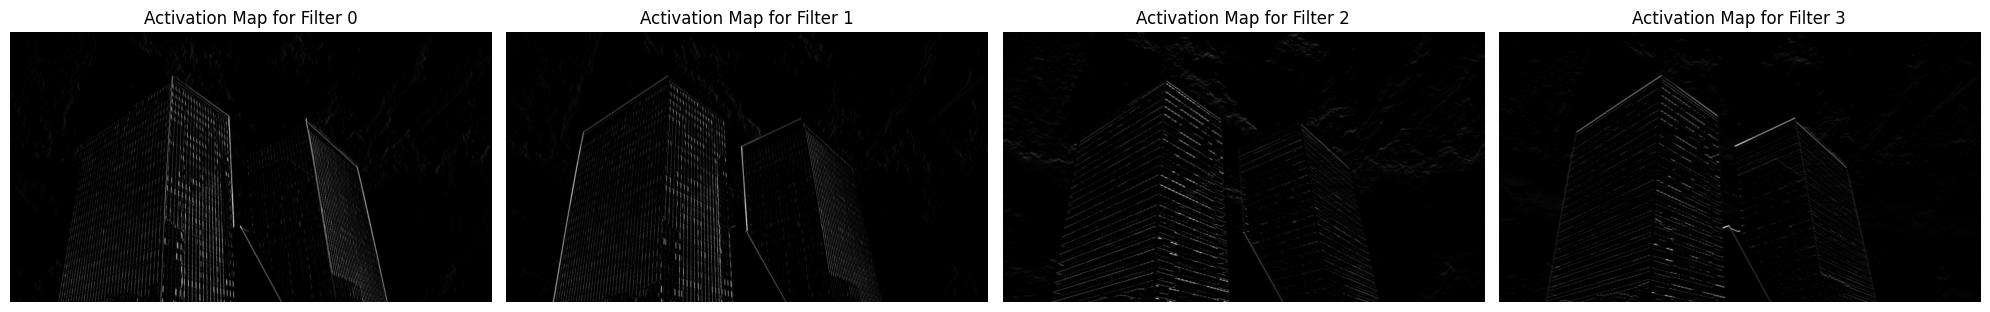

In [22]:
#visualizziamo tutti i filtri
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
fig.tight_layout()

# visualize all activation maps
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
for i, ax in enumerate(axes):
    apply_filter(small_img, i, filters, ax)
    ax.axis('off')
    ax.set_title(f'Activation Map for Filter {i}')
fig.tight_layout()